In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake['label'] = 'fake'
true['label'] = 'real'

In [6]:
df = pd.concat([fake,true], ignore_index=True)

In [7]:
df.sample(5)

,title,text,subject,date,label
19032,THIS IS HUGE! Trump Suspends Expedited H1-B Vi...,WASHINGTON DC Foreigners aiming for temporar...,left-news,"Mar 5, 2017",fake
20980,RUSSIAN TV HOST TRASHES MOOCH: Obama’s Spent $...,"She s such an easy target, it s almost like th...",left-news,"Feb 18, 2016",fake
100,Watch: Joe Biden Just Wrecked Trump In Six Wo...,Former Vice President Joe Biden was asked on M...,News,"November 13, 2017",fake
30817,Mayors of NY and Los Angeles pledge to remain ...,LOS ANGELES/NEW YORK (Reuters) - Officials in ...,politicsNews,"November 11, 2016",real
31619,Globally aligning derivatives rules dominates ...,WASHINGTON (Reuters) - Concerns about coordina...,politicsNews,"September 15, 2016",real


In [8]:
df['label'].value_counts()

label
fake    23481
real    21417
Name: count, dtype: int64

In [9]:
df['text'][0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [11]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [13]:
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|[^a-zA-Z ]", "", text)  
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 3]
    return " ".join(tokens)

df['cleaned_text'] = df['text'].apply(clean_text)

In [14]:
df['cleaned_text'][0]

'donald trump wish american happy year leave instead give shout enemy hater dishonest fake news medium former reality show star country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy year president angry pant tweeted great year america country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy year great year america donald trump realdonaldtrump december trump tweet went welll expectwhat kind president sends year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizen happy year bishop talbert swan talbertswan december like calvin calvinstowell december impeachment would make great year america also accept regaining control congress miranda yaver mirandayaver december hear talk include many people hate wonder hate alan sandoval alansandoval december us word hater year wish marlene mar

In [15]:
df['label_num'] = df['label'].map({'fake': 0, 'real': 1})

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text'])
y = df['label_num']

In [17]:
from wordcloud import WordCloud

Text(0.5, 1.0, 'Word Cloud - Fake News')

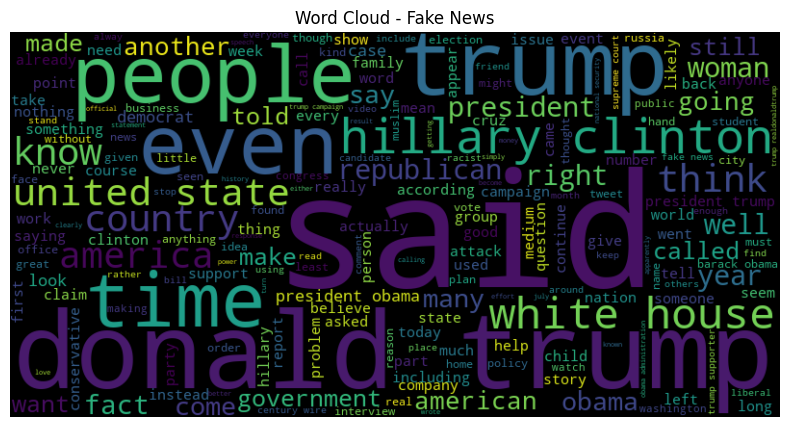

In [18]:
fake_text = " ".join(df[df['label'] == 'fake']['cleaned_text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Fake News')

Text(0.5, 1.0, 'Word Cloud - Real News')

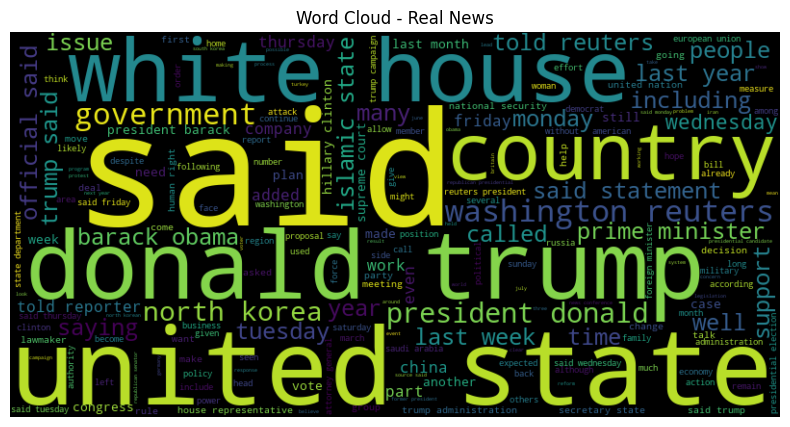

In [19]:
real_text = " ".join(df[df['label'] == 'real']['cleaned_text'])
wordcloud_real = WordCloud(width=800, height=400, background_color='black').generate(real_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Real News')

Text(0, 0.5, 'Count')

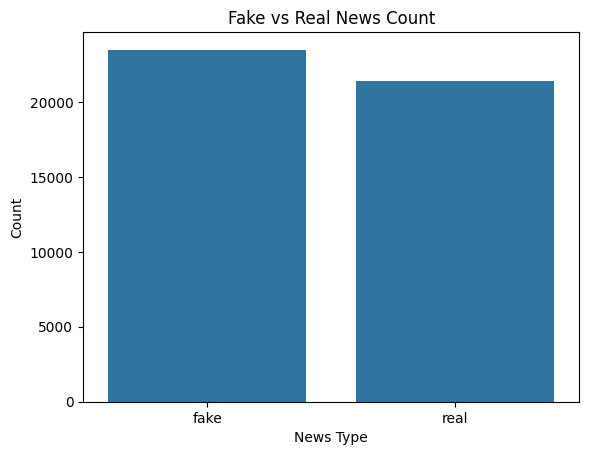

In [20]:
sns.countplot(data=df, x='label')
plt.title("Fake vs Real News Count")
plt.xlabel("News Type")
plt.ylabel("Count")

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
"Accuracy:", accuracy_score(y_test, y_pred)*100

('Accuracy:', 98.54120267260579)

Text(0.5, 1.0, 'Confusion Matrix')

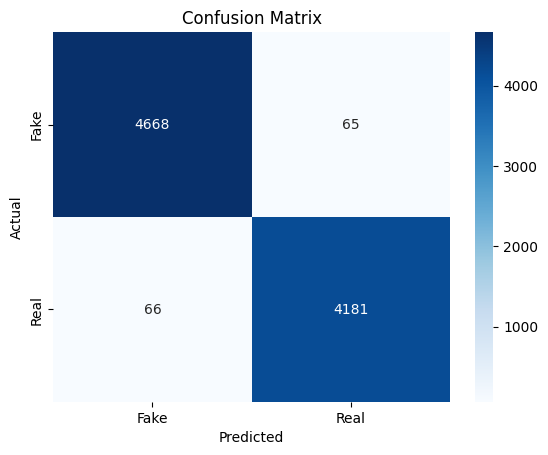

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

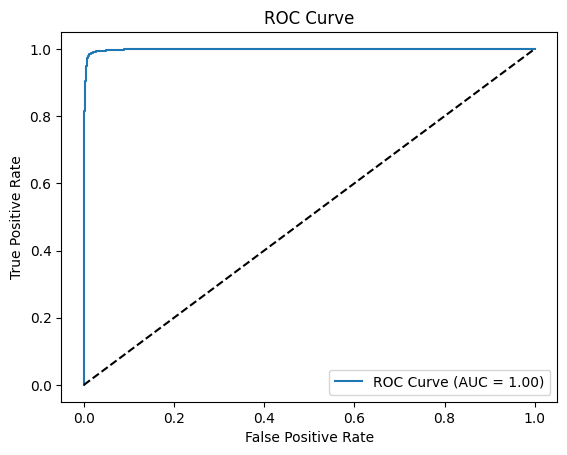

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
def plot_top_words(label, top_n=20):
    vec = CountVectorizer(stop_words='english', max_features=5000)
    X = vec.fit_transform(df[df['label'] == label]['cleaned_text'])
    word_freq = X.sum(axis=0).A1
    vocab = vec.get_feature_names_out()
    freq_df = pd.DataFrame({'word': vocab, 'freq': word_freq})
    top_words = freq_df.sort_values('freq', ascending=False).head(top_n)

    plt.figure(figsize=(10,6))
    sns.barplot(x='freq', y='word', data=top_words)
    plt.title(f'Top {top_n} Words in {label.capitalize()} News')
    plt.xlabel("Frequency")
    plt.ylabel("Words")

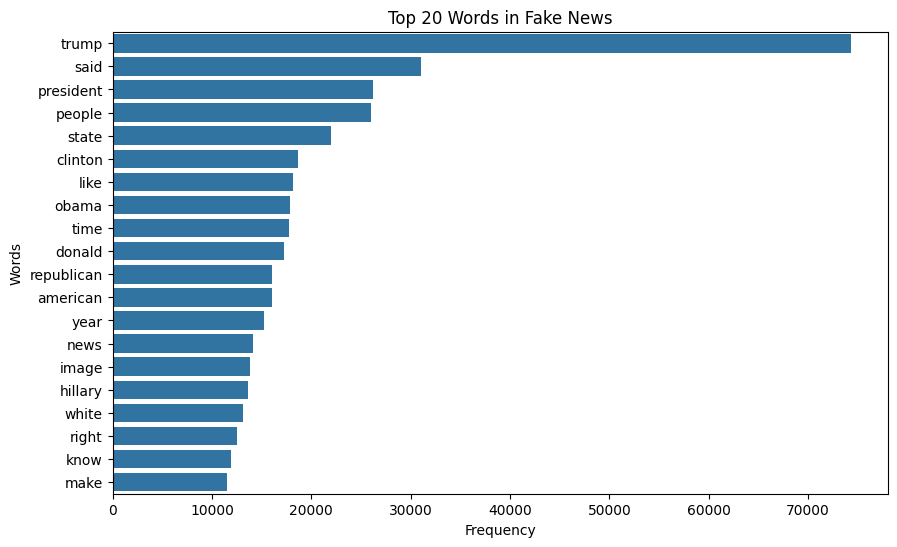

In [27]:
plot_top_words('fake')

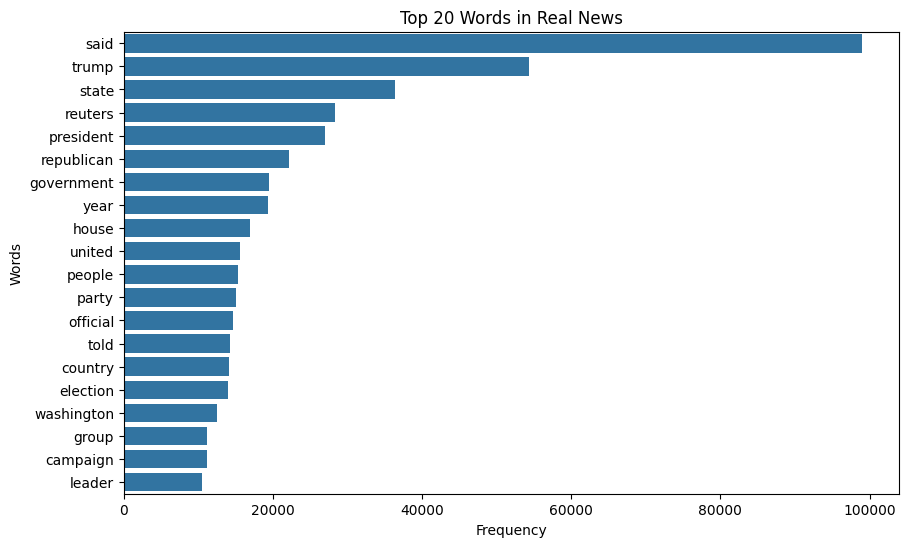

In [28]:
plot_top_words('real')

In [29]:
import pickle

with open('fake_news_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)